In [9]:
import urllib
import json
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt

## write script so you can ask questions to the bea server in an easy wasy with url 
## fields with your key, and other req info
## then also help with things that you want to ask for

%matplotlib notebook

In [3]:
M_dat = pd.read_csv('mich_GDP.csv')
    #read in the annual GDP data for both the Ann Arbor region and the whole state of Michigan
    # acquire through Bureau of Economic Analysis API
    # link: https://www.bea.gov/API/docs/index.htm

In [4]:
Ann_ArborGDP = M_dat.loc[( M_dat['GeoName'].str.contains('Ann Arbor') )]
    # Ann Arbor region only GDP data
Mich_GDP = M_dat.loc[~( M_dat['GeoName'].str.contains('Ann Arbor') )]
    # Full state of Michigan GDP data
Mich_GDP = Mich_GDP.iloc[4:19]
    # Removed years in which there was no data for Ann Arbor GDP as well
Mich_GDP.set_index('Timeperiod', drop=True, inplace=True), Ann_ArborGDP.set_index('Timeperiod', drop=True, inplace=True)
    #reset both indexes to the corresponding year of the GDP measurement

(None, None)

In [5]:
Mich_GDP['DataValue'] = Mich_GDP['DataValue'].apply(lambda x : float(x))
Ann_ArborGDP['DataValue'] = Ann_ArborGDP['DataValue'].apply(lambda x : float(x))
     # converted the numerical GDP data into a float data type to be able to manipulate

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [6]:
Mich_GDP['GDP_%Change'] = (Mich_GDP['DataValue'].pct_change().round(4))*100
Ann_ArborGDP['GDP_%Change'] = (Ann_ArborGDP['DataValue'].pct_change().round(4))*100
    # The below code checks that these values are correct for the first entry
    # (Mich_GDP.DataValue[2002] - Mich_GDP.DataValue[2001])/(Mich_GDP.DataValue[2001])*100
    
    # Adds a new column for the percent change in GDP for each year in each respective area, and rounds to the hundreths place


C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [40]:
DataDict = dict()
DataDict['Mich%_GDP'] = Mich_GDP['GDP_%Change']
DataDict['AnnAbrbor%_GDPChange'] = Ann_ArborGDP['GDP_%Change']
    # Created a dict with series to be able to construct new DF with 
Corr_DF = pd.DataFrame.from_dict(DataDict, orient='columns')
    # Reads the data from the dictionary into a DF
corr_coef = Corr_DF.corr().iloc[1,0].round(4)
    # gets the correlation coefficient of the GDP change data
corr_coef.round(4)

0.79220000000000002

<IPython.core.display.Javascript object>


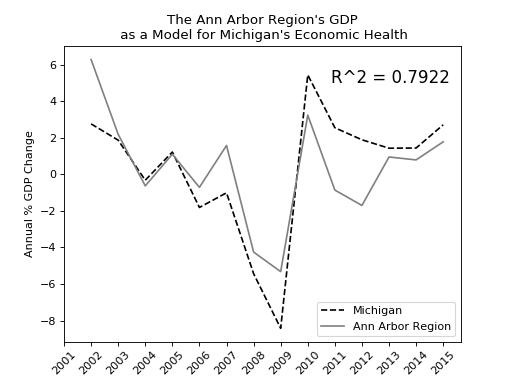

In [75]:
fig, ax = plt.subplots(sharex=True)

ax.plot(Mich_GDP.index, Mich_GDP['GDP_%Change'], color='black', linestyle='--', label='Michigan')
ax.plot(Ann_ArborGDP.index, Ann_ArborGDP['GDP_%Change'], color='grey', linestyle='-', label='Ann Arbor Region')

#plt.xticks(Mich_GDP.index)
    # If the ticks are just displayed with no adjustment they just crowd into each other, and you're unable to read the graph
plt.xticks(Mich_GDP.index, rotation=45)
    # However if the labels are rotated they all fit and look great together!
#ax.set_xticks(Mich_GDP.index, minor=True)
    # this adds minor ticks where the other year values would've been placed
ax.set_ylabel('Annual % GDP Change')
ax.set_title("The Ann Arbor Region's GDP\n as a Model for Michigan's Economic Health")
ax.text(2010.85, 5, 'R^2 = {}'.format(corr_coef), fontsize=15)
plt.legend(loc=4)